<a href="https://colab.research.google.com/github/0xNyme/superstore-eda/blob/main/Superstore_Sales_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ENG
- What products category are selling best?
- Which regions have the highest sales?
- Are there any seasonal trends in sales?

IND
- Kategori Produk apa yang paling laris?
- Wilayah mana dengan penjualan tertinggi?
- Apakah ada tren musiman dalam penjualan?

In [ ]:
!unzip archive.zip

Archive:  archive.zip
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train.csv               


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# EDA

In [ ]:
dt = pd.read_csv('train.csv')

In [ ]:
print("======================")
print("Data Shape: ", dt.shape)
print("======================")
print("Data info: ", dt.info())
print("======================")
print("Data column", dt.columns)
print("======================")

Data Shape:  (9800, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null

In [ ]:
dt.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [ ]:
dt.describe()  # untuk numerik


,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [ ]:
dt.describe(include='object')  # untuk kategorikal

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
count,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800
unique,4922,1230,1326,4,793,793,3,1,529,49,4,1861,3,17,1849
top,CA-2018-100111,05/09/2017,26/09/2018,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope
freq,14,38,34,5859,35,35,5101,9800,891,1946,3140,19,5909,1492,47


In [ ]:
dt.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [ ]:
dt.dropna()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [ ]:
dt.shape

(9800, 18)

In [ ]:
dt['Order Date'] = pd.to_datetime(dt['Order Date'], format='%d/%m/%Y')


In [ ]:
dt['Ship Date'] = pd.to_datetime(dt['Ship Date'], format='%d/%m/%Y')

In [ ]:
dt.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


What products are selling best?

In [ ]:
dt['Category'].value_counts()

,count
Category,
Office Supplies,5909
Furniture,2078
Technology,1813


In [ ]:
sales_by_cat = dt.groupby('Category', as_index=False)['Sales'].sum().sort_values(by='Sales', ascending=False)

In [ ]:
sales_by_cat

,Category,Sales
2,Technology,827455.8730
0,Furniture,728658.5757
1,Office Supplies,705422.3340


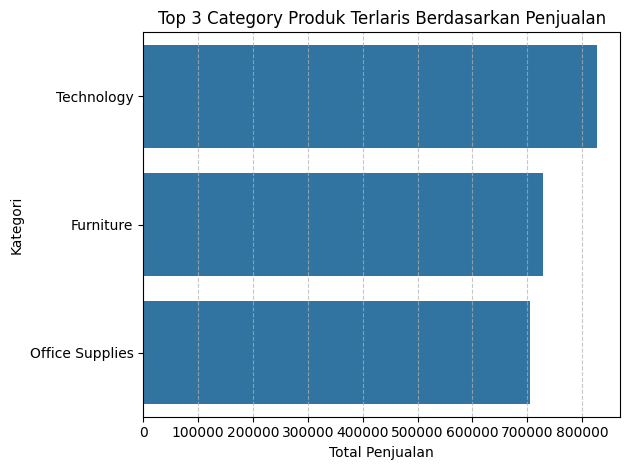

In [ ]:
sns.barplot(x='Sales', y='Category', data=sales_by_cat)

plt.title('Top 3 Category Produk Terlaris Berdasarkan Penjualan')
plt.xlabel('Total Penjualan')
plt.ylabel('Kategori')
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
dt['Sub-Category'].value_counts()

,count
Sub-Category,
Binders,1492
Paper,1338
Furnishings,931
Phones,876
Storage,832
Art,785
Accessories,756
Chairs,607
Appliances,459


In [ ]:
sales_by_subcat = dt.groupby('Sub-Category', as_index=False)['Sales'].sum().sort_values(by='Sales', ascending=False)

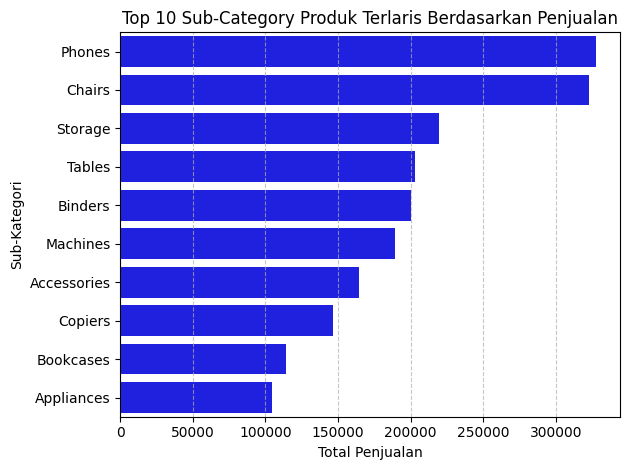

In [ ]:
top_10 = sales_by_subcat.sort_values(by='Sales', ascending=False).head(10)

sns.barplot(x='Sales', y='Sub-Category', data=top_10,color="b")
plt.title('Top 10 Sub-Category Produk Terlaris Berdasarkan Penjualan')
plt.xlabel('Total Penjualan')
plt.ylabel('Sub-Kategori')
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

Which regions have the highest sales?

In [ ]:
state_sales = dt.groupby('State', as_index=False)['Sales'].sum().sort_values(by='Sales', ascending=False)
city_sales = dt.groupby('City', as_index=False)['Sales'].sum().sort_values(by='Sales', ascending=False)

In [ ]:
top_10_state = state_sales.nlargest(10,'Sales')
top_10_city = city_sales.nlargest(10,'Sales')

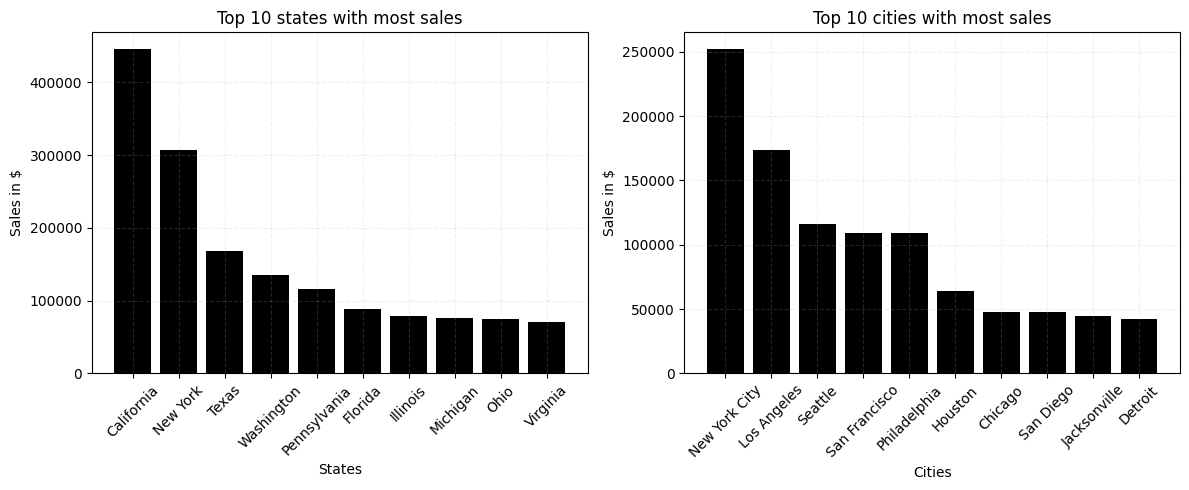

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].bar(top_10_state['State'], top_10_state['Sales'], color='k')
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_title('Top 10 states with most sales')
axes[0].set_xlabel('States')
axes[0].set_ylabel('Sales in $')
axes[0].grid(axis='both', alpha=0.2, linestyle ='--')

axes[1].bar(top_10_city['City'], top_10_city['Sales'], color='k')
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_title('Top 10 cities with most sales')
axes[1].set_xlabel('Cities')
axes[1].set_ylabel('Sales in $')
axes[1].grid(axis='both', alpha=0.2, linestyle ='--')

plt.tight_layout()
plt.show()

In [ ]:
dt['Month'] = dt['Order Date'].dt.strftime('%B')
dt['Year'] = dt['Order Date'].dt.year.astype(int)

In [ ]:
yearly_sales = dt['Year'].value_counts().sort_index().reset_index()

In [ ]:
yearly_sales['Year'] = yearly_sales['Year'].astype(int)

In [ ]:
yearly_sales

,Year,count
0,2015,1953
1,2016,2055
2,2017,2534
3,2018,3258


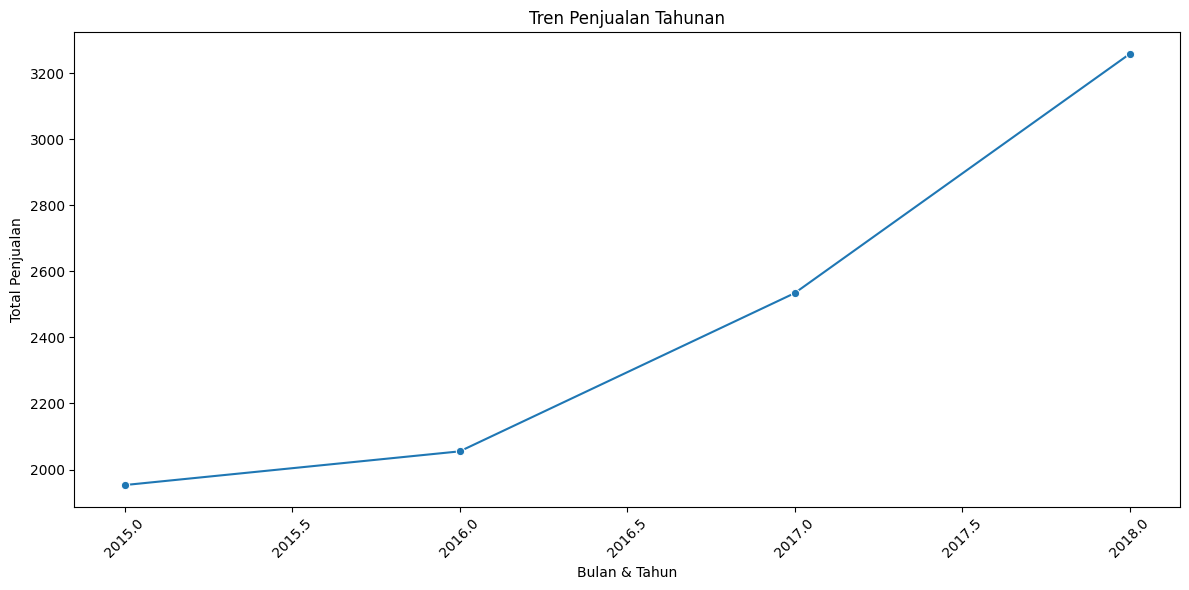

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='count', data=yearly_sales, marker='o')
plt.title('Tren Penjualan Tahunan')
plt.xlabel('Bulan & Tahun')
plt.ylabel('Total Penjualan')
plt.xticks(rotation=45)
plt.grid(False)
plt.tight_layout()
plt.show()

In [ ]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

dt['Month'] = pd.Categorical(dt['Month'], categories=month_order, ordered=True)
monthly_sales = dt['Month'].value_counts().sort_index().reset_index()

In [ ]:
monthly_sales

,Month,count
0,January,366
1,February,297
2,March,680
3,April,657
4,May,725
5,June,691
6,July,697
7,August,693
8,September,1354
9,October,809


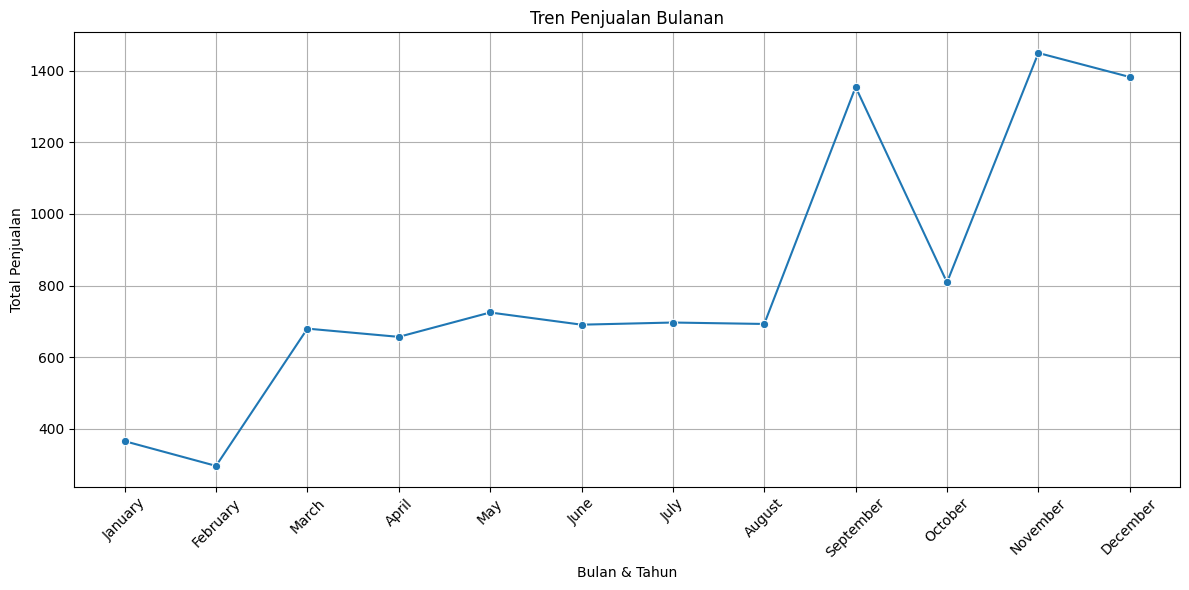

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='count', data=monthly_sales, marker='o')
plt.title('Tren Penjualan Bulanan')
plt.xlabel('Bulan & Tahun')
plt.ylabel('Total Penjualan')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()